# Generalized Langmuir waves in magnetized kinetic plasmas
> - A. J. Willes, and Iver H. Cairns
> - Physics of Plasmas 7, 3167 (2000); doi: 10.1063/1.874180

In [1]:
import numpy as np
import scipy.optimize
from py_vlasov.util import zp, kzkp, list_to_complex, real_imag
from py_vlasov.wrapper import oblique_wrapper, disp_det, input_gen
from py_vlasov.transport_ratios import transport_ratios
from py_vlasov.follow_parameter import follow_k
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = .8
mpl.rcParams['ytick.minor.width'] = .8
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
%matplotlib inline

## Longitudinal approximations to the generalized langmuir mode

Asymptoic expression:
    $$\omega_L^2(k, \theta) = \omega_p^2 + \Omega_e^2\sin^2\theta + 3 k^2 v_{Te}^2$$
Logitudinal approximation:
    See Eqn (19)-(21) in Willes & Cairns (2000)

In [80]:
def f(x, t):
    t = np.deg2rad(t)
    s2, c2, x2 = np.sin(t)**2, np.cos(t)**2, x**2
    ret = 3 * c2**2 
    ret -= s2 * c2 / x2 
    ret -= s2**2 / x2 / (1 - x2) 
    ret += (1 + 3 * x2) * s2 * c2 / x2 / (1 - x2)**3
    ret += s2**2 / x2 / (1 - 4 * x2)
    return ret
    
# define: wo = omega_p/Omega_e
# define wpm = omega_{\pm}
def wpm2(wo, t, sub='plus'):
    t = np.deg2rad(t)
    assert sub in ['plus', 'p', 'minus', 'm']
    wo2, c2 = wo**2, np.cos(t)**2
    sign = 1 if sub in ['plus', 'p'] else -1
    ret = wo2 + 1 + sign * np.sqrt((wo2 + 1)**2 - 4 * wo2 * c2)
    ret /= 2
    return ret

# define: ke = k\rho_e = k v_{Te}/\Omega_e
# define: v_{Te} = \sqrt{k_BT_e/m_e}
def wL(wo, ke, t, sub='plus'):
    assert sub in ['plus', 'p', 'minus', 'm']
    wo2 = wo**2
    w2 = wpm2(wo, t, sub)
    deltaW2 = wpm2(wo, t, 'p') -  wpm2(wo, t, 'm')
    sign = 1 if sub in ['plus', 'p'] else -1
    ret = w2 + sign * wo2 * (w2 - 1) / deltaW2 * ke**2 / w2 * f(1/np.sqrt(w2), t)
    return  np.sqrt(ret)

wLvec = np.vectorize(wL)

def asymptoticWL(wo, klambdaD, t):
    s2 = np.sin(np.deg2rad(t))**2
    ret = 1 + 1/wo * s2 + 3 * klambdaD**2
    return np.sqrt(ret)

In [128]:
klambdaD = np.linspace(0.01, 0.4, 20)
wo, t = 20, 30
ke = klambdaD * wo

In [129]:
# asymptotic expression when Omega_e << omega_p
wl_asym = asymptoticWL(wo, klambdaD, t)

# longitudinal approximation
wl_long = wLvec(wo, ke, t, 'p') / wo

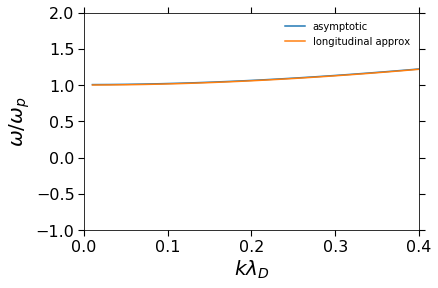

In [130]:
plt.plot(klambdaD, wl_asym, label='asymptotic')
plt.plot(klambdaD, wl_long, label='longitudinal approx')
plt.xlabel(r'$k\lambda_D$')
plt.ylabel(r'$\omega/\omega_{p}$')
plt.legend(loc='best', frameon=False)
plt.ylim([-1, 2])
plt.xlim([0, 0.4])
plt.show()

In [ ]:
# war